In [8]:
# !pip install ultralytics
# ! git clone https://github.com/ultralytics/yolov5.git

In [1]:
# !python -m venv venv-yolov5
# !venv-yolov5\Scripts\activate.bat
# !pip install --quiet -r yolov5/requirements.txt

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\06-object-detection-using-yolo\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 36.8ms
Speed: 1.9ms preprocess, 36.8ms inference, 62.5ms postprocess per image at shape (1, 3, 640, 480)


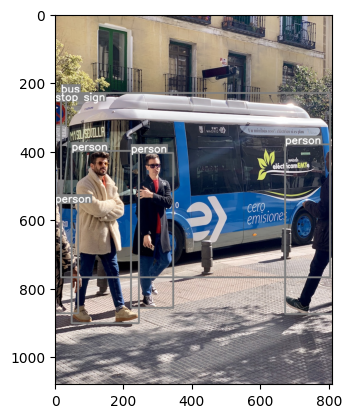

In [ ]:
from ultralytics import YOLO
from pathlib import Path

model = YOLO('./06-object-detection-using-yolo/yolov8n.pt')
model.info()

results = model('./06-object-detection-using-yolo/bus.jpg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

In [3]:
from ultralytics import YOLO

model = YOLO('06-object-detection-using-yolo/yolov8n.pt')  # load a pretrained model
model.info()

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)


image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\06-object-detection-using-yolo\test.jpg: 480x640 1 person, 2 cars, 4 traffic lights, 1 fire hydrant, 35.2ms
Speed: 1.8ms preprocess, 35.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


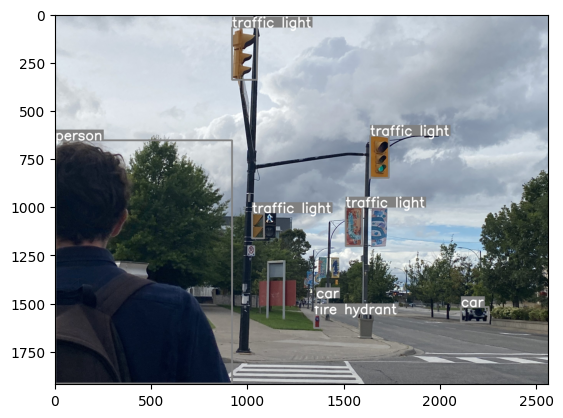

In [4]:
results = model(source='06-object-detection-using-yolo/test.jpg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

In [5]:
from ultralytics import YOLO
import torch
use_pretrained = True

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('06-object-detection-using-yolo/yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('06-object-detection-using-yolo/yolov8n.yaml') # load a scratch model

model.info()

epochs = 1
data = '06-object-detection-using-yolo/coco128.yaml'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Uncomment the following to train
# This takes a while
results = model.train(data=data, epochs=epochs, device=device);

Using a pretrained model
YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
engine\trainer: task=detect, mode=train, model=06-object-detection-using-yolo/yolov8n.pt, data=06-object-detection-using-yolo/coco128.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fa

train: Scanning C:\Users\alihu\Documents\Computer Vision\YOLO\datasets\coco128\labels\train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
val: Scanning C:\Users\alihu\Documents\Computer Vision\YOLO\datasets\coco128\labels\train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs\detect\train7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train7
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.48G      1.214      1.669      1.271        217        640: 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]


                   all        128        929      0.645       0.53      0.609       0.45

1 epochs completed in 0.003 hours.
Optimizer stripped from runs\detect\train7\weights\last.pt, 6.5MB
Optimizer stripped from runs\detect\train7\weights\best.pt, 6.5MB

Validating runs\detect\train7\weights\best.pt...
Ultralytics 8.3.93  Python-3.11.0 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


                   all        128        929      0.648      0.524      0.609       0.45
                person         61        254      0.791      0.672      0.763       0.54
               bicycle          3          6      0.495      0.333      0.315      0.273
                   car         12         46      0.789      0.217      0.276      0.169
            motorcycle          4          5      0.682      0.865      0.898      0.718
              airplane          5          6      0.822      0.777      0.927      0.696
                   bus          5          7      0.552      0.714      0.727      0.675
                 train          3          3      0.533      0.667       0.69      0.586
                 truck          5         12          1      0.324      0.477      0.286
                  boat          2          6      0.256      0.167      0.352      0.235
         traffic light          4         14      0.741      0.207      0.205       0.14
             stop sig

In [6]:
import xml.etree.ElementTree as ET

# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text

        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"trafficlight": 0,
                           "stop": 1,
                           "speedlimit": 2,
                           "crosswalk": 3}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict, rootpath='.', write_to_file=False):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))

    if write_to_file:
        # Name of the file which we have to save 
        save_file_name = os.path.join(rootpath, "annotations", info_dict["filename"].replace("png", "txt"))
    
        # Save the annotation to disk
        print("\n".join(print_buffer), file= open(save_file_name, "w"))
    else:
        return print_buffer 

In [7]:
xml_file = '06-object-detection-using-yolo/road0.xml'
xml_info = extract_info_from_xml(xml_file)
print('xml_info:\n', xml_info)

yolo_annotations = convert_to_yolov5(xml_info)
print('yolo_annotations:\n', yolo_annotations)

xml_info:
 {'bboxes': [{'class': 'trafficlight', 'xmin': 98, 'ymin': 62, 'xmax': 208, 'ymax': 232}], 'filename': 'road0.png', 'image_size': (267, 400, 3)}
yolo_annotations:
 ['0 0.573 0.367 0.412 0.425']


In [9]:
import os
from tqdm import tqdm

# Rootpath indicates the root folder where you have stored the road-sign-detection dataset
rootpath = "./road-sign-detection"

annotations = [os.path.join(rootpath,'annotations', x) for x in os.listdir(os.path.join(rootpath,'annotations')) if x[-3:] == "xml"]
annotations.sort()

for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict, rootpath=rootpath, write_to_file=True)
annotations = [os.path.join(rootpath,'annotations', x) for x in os.listdir(os.path.join(rootpath,'annotations')) if x[-3:] == "txt"]

100%|██████████| 877/877 [00:04<00:00, 212.95it/s]


In [13]:
import random
from sklearn.model_selection import train_test_split
import shutil

images = [os.path.join(rootpath, 'images', x) for x in os.listdir(os.path.join(rootpath, 'images'))]
annotations = [os.path.join(rootpath,'annotations', x) for x in os.listdir(os.path.join(rootpath,'annotations')) if x[-3:] == "txt"]

images.sort()
annotations.sort()

train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [14]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

In [ ]:
# move_files_to_folder(train_images,destination_folder="./data/images/train")
# move_files_to_folder(val_images,destination_folder="./data/images/val")
# move_files_to_folder(test_images,destination_folder="./data/images/test")
# move_files_to_folder(train_annotations,destination_folder="./data/labels/train")
# move_files_to_folder(val_annotations,destination_folder="./data/labels/val")
# move_files_to_folder(test_annotations,destination_folder="./data/labels/test")

# TRAINING - Pretrained with no fine tuning

In [57]:
print('Using a pretrained model')
model = YOLO('06-object-detection-using-yolo/yolov8n.pt')  # load a pretrained model


results = model.val(data='road_sign.yaml')
print(results.box.map)    # mean Average Precision


Using a pretrained model
Ultralytics 8.3.93  Python-3.11.0 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning C:\Users\alihu\Documents\Computer Vision\YOLO\data\labels\val.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]


                   all         88        132    0.00687     0.0439    0.00373   0.000772
                person         10         19    0.00231      0.105    0.00144    0.00114
               bicycle         10         10          0          0          0          0
                   car         69         81    0.00137     0.0247   0.000704   0.000669
            motorcycle         16         22     0.0238     0.0455     0.0128    0.00128
Speed: 1.2ms preprocess, 6.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\val9
0.0007719753207891265



image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road293.png: 640x480 (no detections), 14.6ms
Speed: 1.7ms preprocess, 14.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road445.png: 640x480 1 car, 14.0ms
Speed: 1.6ms preprocess, 14.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road183.png: 640x480 2 cars, 13.9ms
Speed: 1.7ms preprocess, 13.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road174.png: 640x480 1 stop sign, 1 clock, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


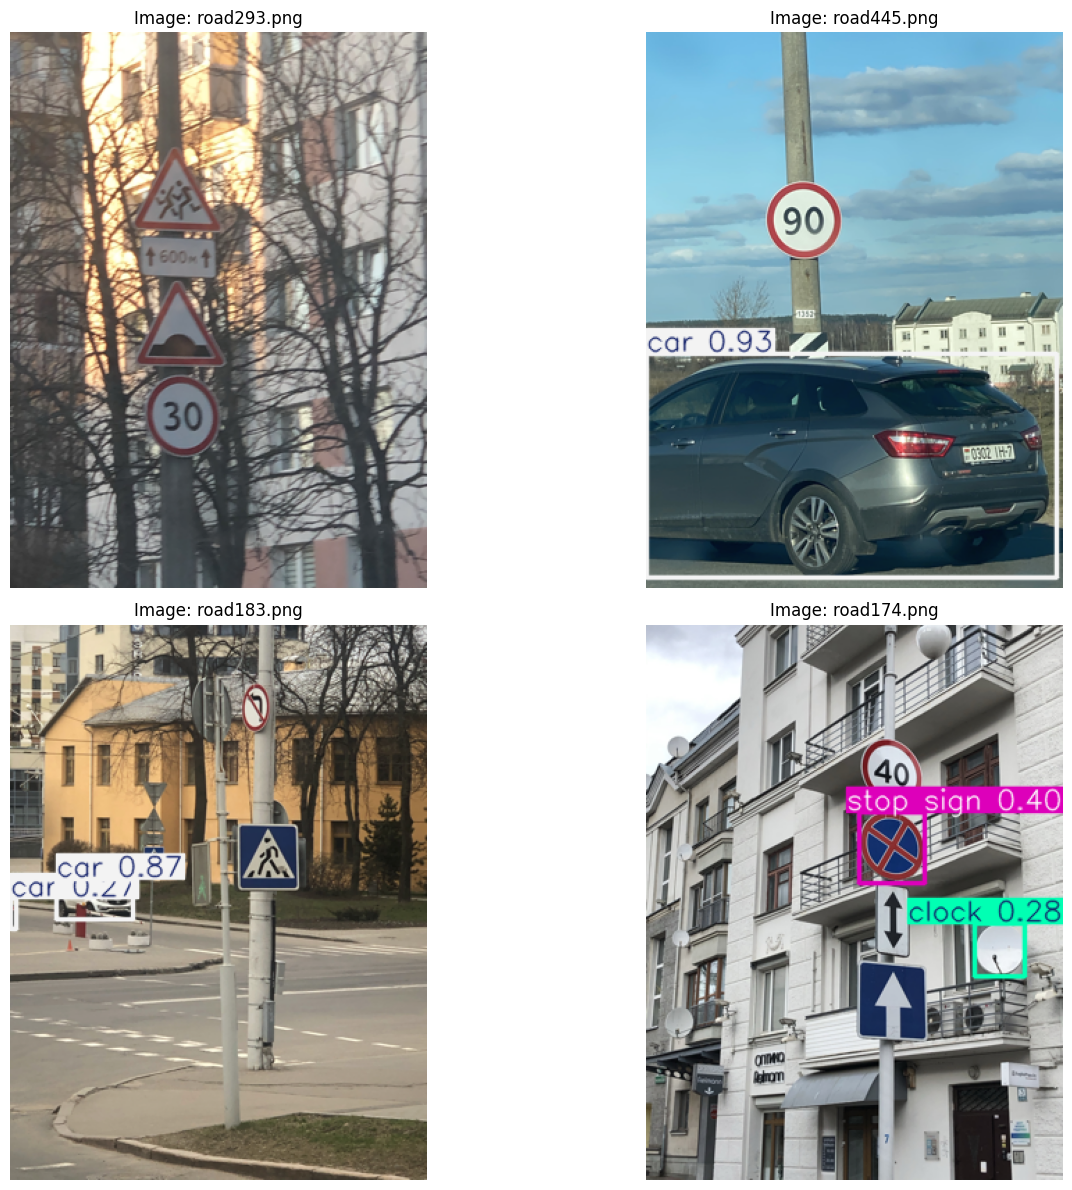

In [58]:
test_dir = Path('./data/images/test/')
test_images = list(test_dir.glob('*.png'))
random_images = random.sample(test_images, 4)
plt.figure(figsize=(15, 12))

for i, img_path in enumerate(random_images):
    # Run inference
    results = model.predict(str(img_path), conf=0.25)
    
    # Get the image with annotations
    annotated_img = results[0].plot()
    
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.subplot(2, 2, i+1)
    plt.imshow(annotated_img)
    plt.title(f"Image: {img_path.name}")
    plt.axis('off')

plt.tight_layout()
plt.savefig('random_test_predictions.png')
plt.show()


# TRAINING - Pretrained with 5 epochs

In [59]:
model = YOLO('06-object-detection-using-yolo/yolov8n.pt')
results = model.train(data='road_sign.yaml', epochs = 5)
results = model.val(data='road_sign.yaml')
print(results.box.map) 

Ultralytics 8.3.93  Python-3.11.0 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=06-object-detection-using-yolo/yolov8n.pt, data=road_sign.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

train: Scanning C:\Users\alihu\Documents\Computer Vision\YOLO\data\labels\train.cache... 701 images, 0 backgrounds, 0 corrupt: 100%|██████████| 701/701 [00:00<?, ?it/s]
val: Scanning C:\Users\alihu\Documents\Computer Vision\YOLO\data\labels\val.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]


Plotting labels to runs\detect\train14\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train14
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.03G     0.7721      2.578     0.9315         32        640: 100%|██████████| 44/44 [00:10<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]

                   all         88        132          1      0.129       0.56      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.32G     0.7896      1.495     0.9345         50        640: 100%|██████████| 44/44 [00:09<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.53it/s]

                   all         88        132      0.752      0.646       0.75      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.34G     0.7502      1.285     0.9333         26        640: 100%|██████████| 44/44 [00:09<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]

                   all         88        132      0.912      0.788      0.888      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.34G     0.7014      1.089     0.9134         37        640: 100%|██████████| 44/44 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         88        132      0.915      0.856      0.911      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.35G     0.6462     0.9812     0.8978         27        640: 100%|██████████| 44/44 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         88        132      0.922      0.886      0.911       0.73



5 epochs completed in 0.016 hours.
Optimizer stripped from runs\detect\train14\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train14\weights\best.pt, 6.2MB

Validating runs\detect\train14\weights\best.pt...
Ultralytics 8.3.93  Python-3.11.0 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]


                   all         88        132      0.915      0.856      0.911      0.736
          trafficlight         10         19      0.811      0.677      0.814      0.496
                  stop         10         10      0.956        0.9      0.897      0.833
            speedlimit         69         81      0.974      0.939      0.989      0.864
             crosswalk         16         22      0.918      0.909      0.943      0.752
Speed: 0.2ms preprocess, 3.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\train14
Ultralytics 8.3.93  Python-3.11.0 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\alihu\Documents\Computer Vision\YOLO\data\labels\val.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]


                   all         88        132      0.928      0.857      0.914      0.741
          trafficlight         10         19      0.865      0.678      0.824      0.508
                  stop         10         10      0.955        0.9      0.897      0.825
            speedlimit         69         81      0.974      0.942      0.989       0.87
             crosswalk         16         22      0.918      0.909      0.945      0.762
Speed: 1.1ms preprocess, 4.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train142
0.7409292578791502



image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road550.png: 640x480 1 speedlimit, 22.6ms
Speed: 2.7ms preprocess, 22.6ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road590.png: 640x480 1 speedlimit, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road143.png: 640x448 1 crosswalk, 9.9ms
Speed: 1.4ms preprocess, 9.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road408.png: 640x480 1 trafficlight, 1 speedlimit, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


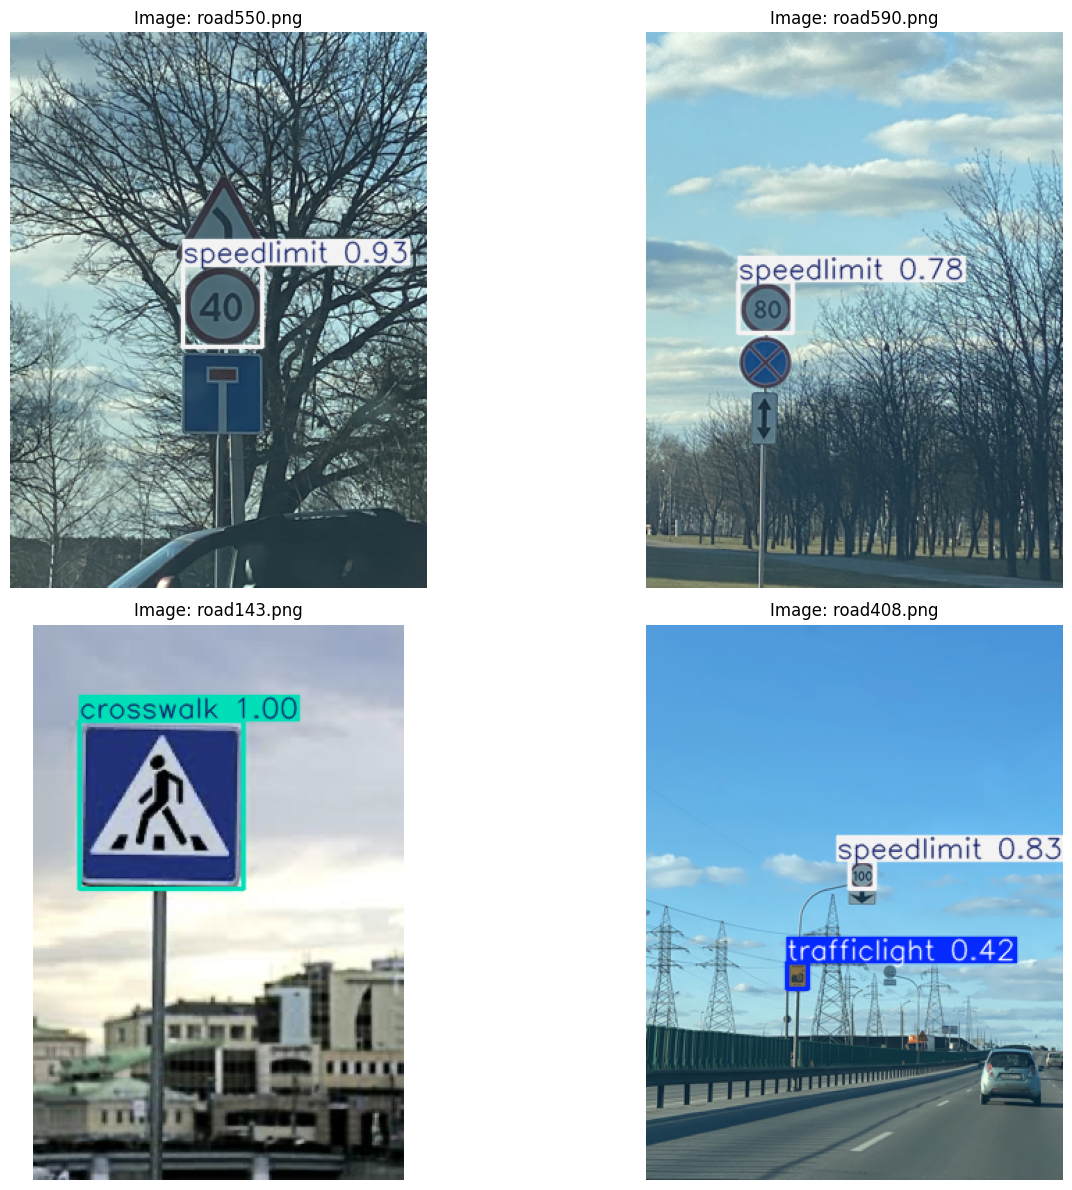

In [60]:
test_dir = Path('./data/images/test/')
test_images = list(test_dir.glob('*.png'))
random_images = random.sample(test_images, 4)
plt.figure(figsize=(15, 12))

for i, img_path in enumerate(random_images):
    # Run inference
    results = model.predict(str(img_path), conf=0.25)
    
    # Get the image with annotations
    annotated_img = results[0].plot()
    
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.subplot(2, 2, i+1)
    plt.imshow(annotated_img)
    plt.title(f"Image: {img_path.name}")
    plt.axis('off')

plt.tight_layout()
plt.savefig('random_test_predictions.png')
plt.show()


# TRAINING - Training from scratch with 5 epochs

In [61]:

print('Using a scratch model')
model = YOLO('yolov8n.yaml')
results = model.train(data='road_sign.yaml', epochs = 5)
results = model.val(data='road_sign.yaml')

print(results.box.map)

Using a scratch model
Ultralytics 8.3.93  Python-3.11.0 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=road_sign.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning C:\Users\alihu\Documents\Computer Vision\YOLO\data\labels\train.cache... 701 images, 0 backgrounds, 0 corrupt: 100%|██████████| 701/701 [00:00<?, ?it/s]
val: Scanning C:\Users\alihu\Documents\Computer Vision\YOLO\data\labels\val.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]


Plotting labels to runs\detect\train15\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train15
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.08G      3.536      5.461      4.327         32        640: 100%|██████████| 44/44 [00:10<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]


                   all         88        132   0.000264     0.0724   0.000463   9.84e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.37G      3.344      4.681      3.849         50        640: 100%|██████████| 44/44 [00:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]

                   all         88        132   0.000269     0.0724   0.000522   0.000138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.39G      2.998      4.265      3.396         26        640: 100%|██████████| 44/44 [00:09<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]

                   all         88        132      0.703     0.0404     0.0375      0.016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.39G      2.575      3.598      2.991         37        640: 100%|██████████| 44/44 [00:10<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         88        132      0.822       0.13      0.175     0.0852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.41G       2.33      3.135      2.697         27        640: 100%|██████████| 44/44 [00:12<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all         88        132      0.729      0.244       0.27      0.151



5 epochs completed in 0.018 hours.
Optimizer stripped from runs\detect\train15\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train15\weights\best.pt, 6.2MB

Validating runs\detect\train15\weights\best.pt...
Ultralytics 8.3.93  Python-3.11.0 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]


                   all         88        132      0.729      0.244       0.27      0.152
          trafficlight         10         19          1          0    0.00326   0.000624
                  stop         10         10      0.481        0.3      0.347      0.152
            speedlimit         69         81      0.436      0.676      0.613      0.388
             crosswalk         16         22          1          0      0.117     0.0655
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train15
Ultralytics 8.3.93  Python-3.11.0 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\alihu\Documents\Computer Vision\YOLO\data\labels\val.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]


                   all         88        132      0.728      0.245      0.264      0.151
          trafficlight         10         19          1          0    0.00325   0.000627
                  stop         10         10      0.482        0.3      0.347      0.152
            speedlimit         69         81      0.429      0.679      0.615      0.395
             crosswalk         16         22          1          0     0.0917      0.056
Speed: 0.9ms preprocess, 4.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train152
0.15070529190515633



image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road550.png: 640x480 1 speedlimit, 10.4ms
Speed: 2.2ms preprocess, 10.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road590.png: 640x480 1 speedlimit, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road143.png: 640x448 (no detections), 11.8ms
Speed: 1.3ms preprocess, 11.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road408.png: 640x480 2 speedlimits, 9.9ms
Speed: 2.5ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


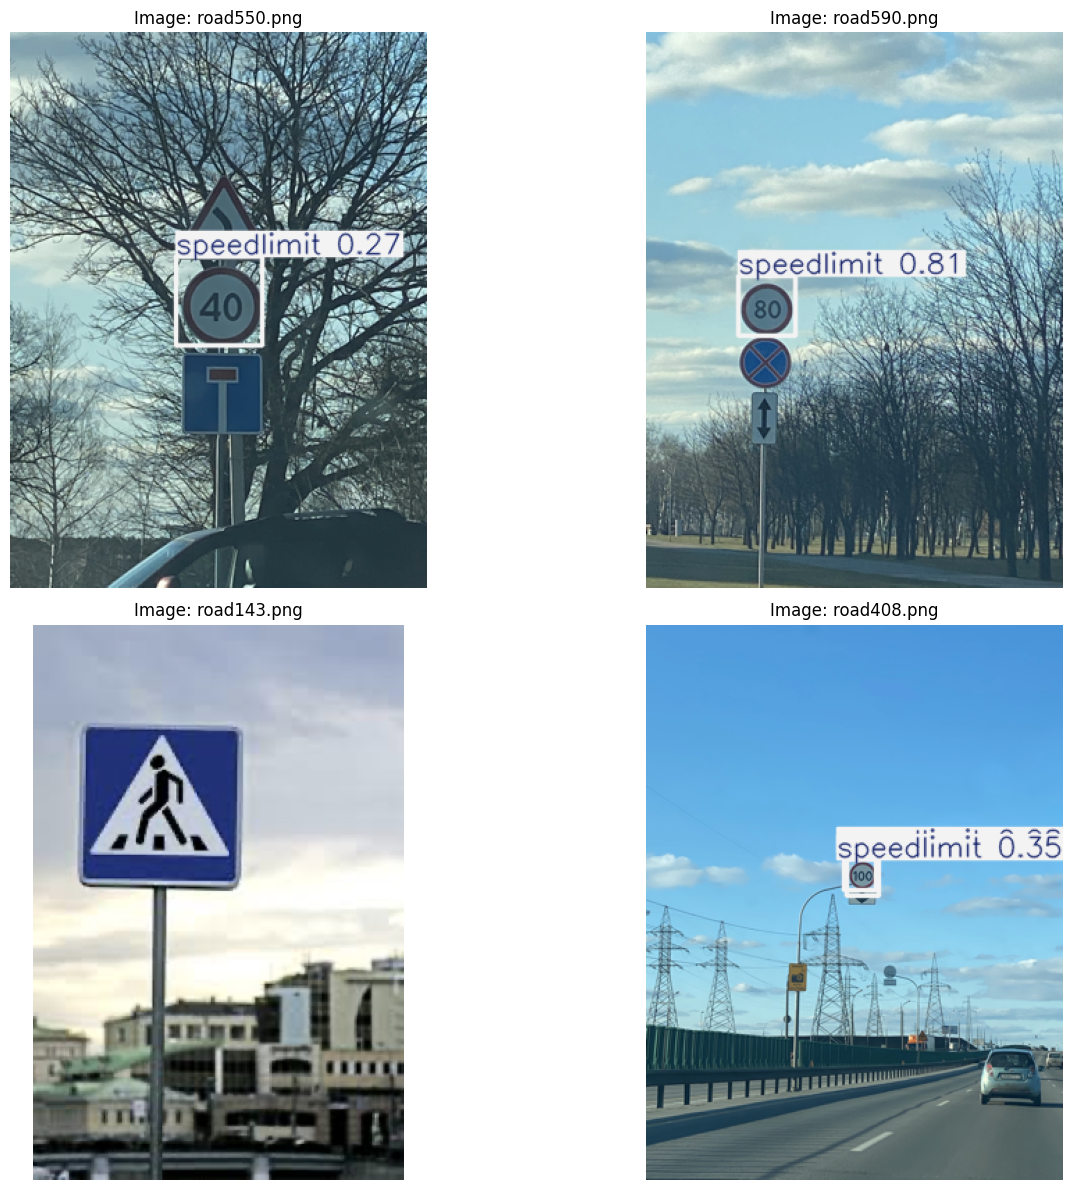

In [62]:
test_dir = Path('./data/images/test/')
test_images = list(test_dir.glob('*.png'))
random_images = random.sample(test_images, 4)
plt.figure(figsize=(15, 12))

for i, img_path in enumerate(random_images):
    # Run inference
    results = model.predict(str(img_path), conf=0.25)
    
    # Get the image with annotations
    annotated_img = results[0].plot()
    
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.subplot(2, 2, i+1)
    plt.imshow(annotated_img)
    plt.title(f"Image: {img_path.name}")
    plt.axis('off')

plt.tight_layout()
plt.savefig('random_test_predictions.png')
plt.show()


# TRAINING - Training from scratch with 15 epochs

In [63]:

print('Using a scratch model')
model = YOLO('yolov8n.yaml')
results = model.train(data='road_sign.yaml', epochs = 15)
results = model.val(data='road_sign.yaml')

print(results.box.map)

Using a scratch model
Ultralytics 8.3.93  Python-3.11.0 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=road_sign.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

train: Scanning C:\Users\alihu\Documents\Computer Vision\YOLO\data\labels\train.cache... 701 images, 0 backgrounds, 0 corrupt: 100%|██████████| 701/701 [00:00<?, ?it/s]
val: Scanning C:\Users\alihu\Documents\Computer Vision\YOLO\data\labels\val.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]


Plotting labels to runs\detect\train16\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train16
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.09G      3.536      5.461      4.327         32        640: 100%|██████████| 44/44 [00:10<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]

                   all         88        132   0.000264     0.0724   0.000463   9.84e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.38G      3.314      4.678      3.811         50        640: 100%|██████████| 44/44 [00:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]

                   all         88        132   0.000277     0.0724   0.000421   0.000129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15       2.4G      2.876      4.132      3.261         26        640: 100%|██████████| 44/44 [00:09<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]

                   all         88        132      0.579     0.0593     0.0442     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15       2.4G      2.393      3.375      2.731         37        640: 100%|██████████| 44/44 [00:10<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]

                   all         88        132      0.551     0.0586     0.0847     0.0456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15       2.4G       2.06        2.7      2.406         27        640: 100%|██████████| 44/44 [00:09<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]

                   all         88        132      0.718      0.229      0.292      0.179


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15       2.4G      1.561      2.451      2.053         18        640: 100%|██████████| 44/44 [00:09<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]

                   all         88        132      0.792      0.361      0.392      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15       2.4G      1.361      2.002      1.865         19        640: 100%|██████████| 44/44 [00:09<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]


                   all         88        132      0.571        0.5      0.524      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15       2.4G      1.262      1.768      1.722         16        640: 100%|██████████| 44/44 [00:09<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]

                   all         88        132      0.879      0.403      0.521      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15       2.4G      1.182      1.539      1.651         16        640: 100%|██████████| 44/44 [00:10<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         88        132      0.897      0.493      0.565        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15       2.4G      1.149      1.432      1.595         16        640: 100%|██████████| 44/44 [00:10<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]


                   all         88        132      0.871      0.529      0.617      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15       2.4G       1.11      1.335      1.548         25        640: 100%|██████████| 44/44 [00:10<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]

                   all         88        132      0.982      0.541      0.621      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15       2.4G      1.075      1.243      1.522         17        640: 100%|██████████| 44/44 [00:09<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         88        132      0.962      0.561      0.638       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15       2.4G       1.03      1.163      1.455         21        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         88        132      0.793      0.586      0.653      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15       2.4G     0.9817      1.105      1.421         15        640: 100%|██████████| 44/44 [00:10<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         88        132      0.637      0.619      0.658      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15       2.4G     0.9431      1.064      1.394         16        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         88        132      0.927      0.615      0.677      0.484



15 epochs completed in 0.052 hours.
Optimizer stripped from runs\detect\train16\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train16\weights\best.pt, 6.2MB

Validating runs\detect\train16\weights\best.pt...
Ultralytics 8.3.93  Python-3.11.0 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]


                   all         88        132      0.973      0.583      0.661      0.496
          trafficlight         10         19          1          0     0.0686     0.0174
                  stop         10         10          1      0.789      0.878      0.663
            speedlimit         69         81      0.971      0.951      0.975      0.817
             crosswalk         16         22       0.92      0.591      0.721      0.487
Speed: 0.2ms preprocess, 4.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train16
Ultralytics 8.3.93  Python-3.11.0 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\alihu\Documents\Computer Vision\YOLO\data\labels\val.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]


                   all         88        132      0.973      0.583      0.661      0.494
          trafficlight         10         19          1          0     0.0677     0.0174
                  stop         10         10          1      0.789      0.878      0.655
            speedlimit         69         81      0.973      0.951      0.975      0.817
             crosswalk         16         22       0.92      0.591      0.722      0.487
Speed: 1.0ms preprocess, 5.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train162
0.49416708353688854



image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road672.png: 640x480 1 speedlimit, 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road665.png: 640x480 2 speedlimits, 15.4ms
Speed: 2.3ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road563.png: 640x480 1 speedlimit, 1 crosswalk, 20.3ms
Speed: 2.3ms preprocess, 20.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\alihu\Documents\Computer Vision\YOLO\data\images\test\road433.png: 640x480 1 speedlimit, 11.4ms
Speed: 4.7ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


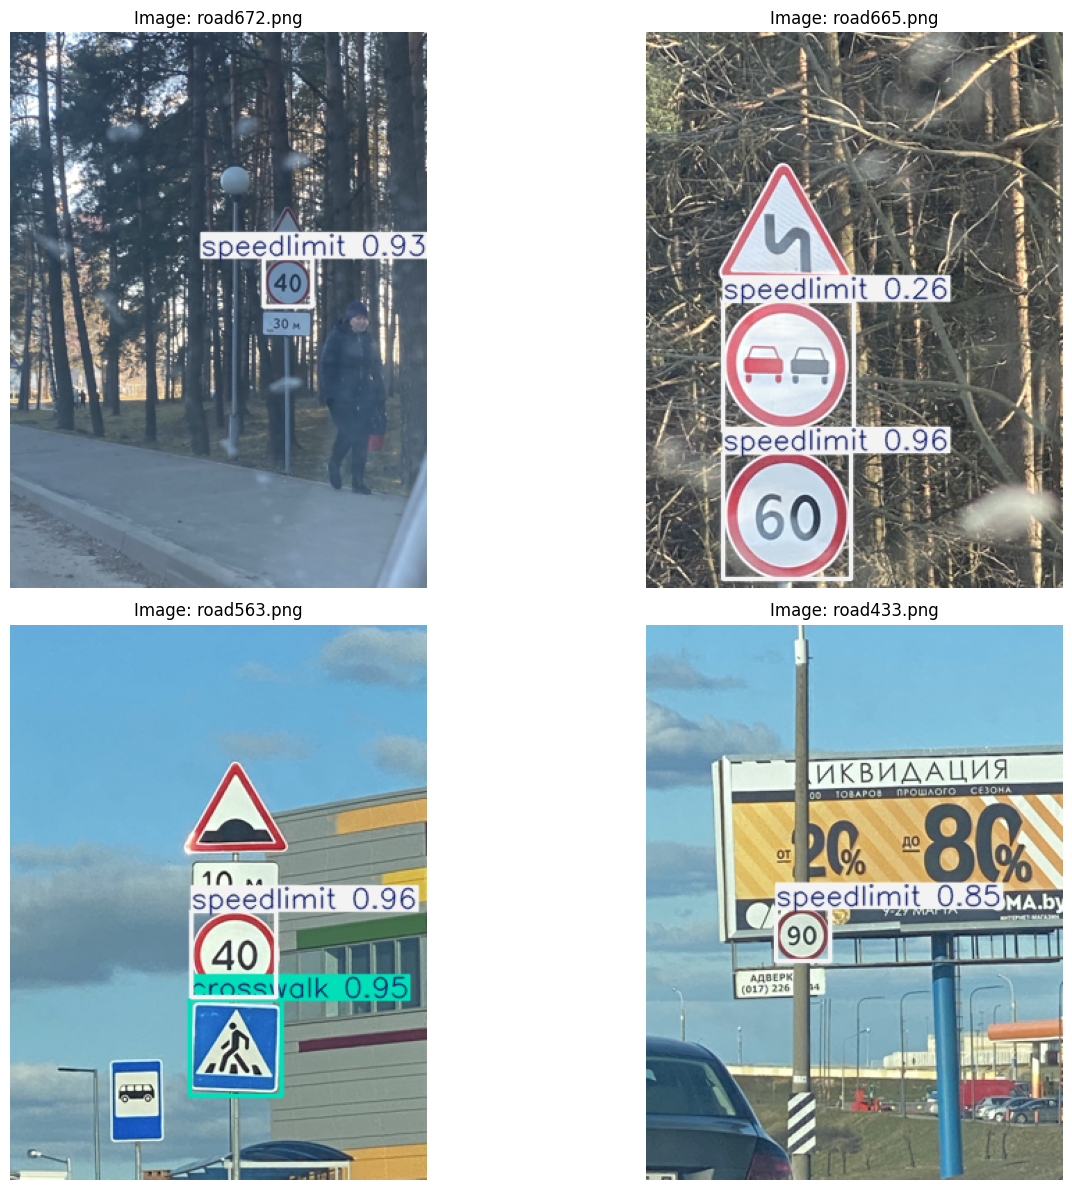

In [65]:
test_dir = Path('./data/images/test/')
test_images = list(test_dir.glob('*.png'))
random_images = random.sample(test_images, 4)
plt.figure(figsize=(15, 12))

for i, img_path in enumerate(random_images):
    # Run inference
    results = model.predict(str(img_path), conf=0.25)
    
    # Get the image with annotations
    annotated_img = results[0].plot()
    
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.subplot(2, 2, i+1)
    plt.imshow(annotated_img)
    plt.title(f"Image: {img_path.name}")
    plt.axis('off')

plt.tight_layout()
plt.savefig('random_test_predictions.png')
plt.show()


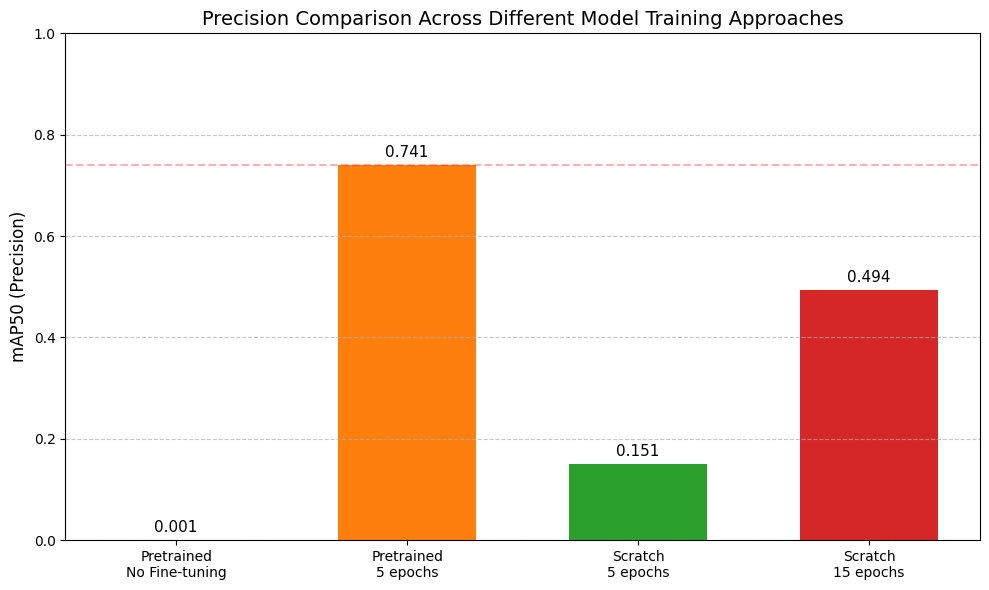

In [ ]:
precision_values = [0.000771, 0.740929, 0.150705, 0.494167]  

model_types = ['Pretrained\nNo Fine-tuning', 'Pretrained\n5 epochs', 
              'Scratch\n5 epochs', 'Scratch\n15 epochs']

plt.figure(figsize=(10, 6))
bars = plt.bar(model_types, precision_values, width=0.6, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=11)

plt.ylabel('mAP50 (Precision)', fontsize=12)
plt.title('Precision Comparison Across Different Model Training Approaches', fontsize=14)
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1 for precision values
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.axhline(y=max(precision_values), color='red', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('precision_comparison.png', dpi=300)
plt.show()